In [2]:
import pandas as pd

df = pd.read_csv("llm_comparison.csv")

df.head()

,provider,model,type,input,output,completion_tokens,completion_time,speed
0,NVIDIA,meta/llama-3.3-70b-instruct,cloud,Explain gradient descent in 1000 words,**Introduction to Gradient Descent**\n========...,1024,14.187892,72.174215
1,Groq,llama-3.3-70b-specdec,cloud,Explain gradient descent in 1000 words,**Introduction to Gradient Descent**\n========...,1326,0.695850,1905.583349
2,Groq,llama-3.3-70b-versatile,cloud,Explain gradient descent in 1000 words,**Introduction to Gradient Descent**\n========...,1300,4.727273,275.000000
3,Together,meta-llama/Llama-3.3-70B-Instruct-Turbo,cloud,Explain gradient descent in 1000 words,**Introduction to Gradient Descent**\n========...,1105,9.114778,121.231696
4,OpenRouter,meta-llama/llama-3.3-70b-instruct,cloud,Explain gradient descent in 1000 words,Gradient descent is a fundamental concept in m...,1292,41.275285,31.302025


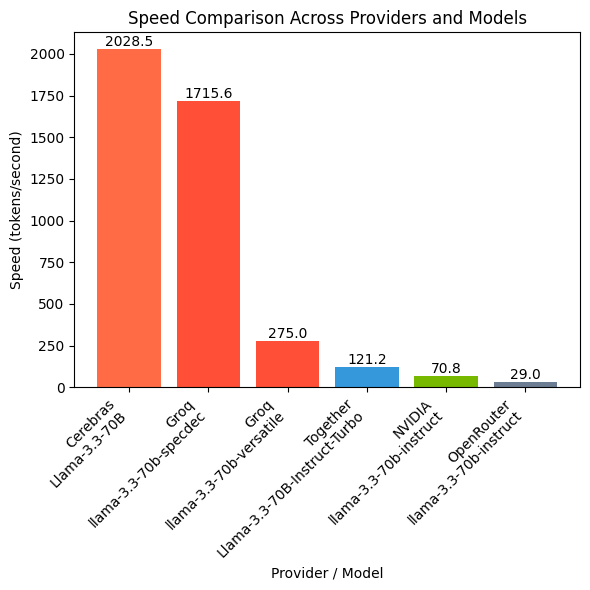

In [12]:
import matplotlib.pyplot as plt

# Calculate average speed per provider/model and sort
df["model"] = df["model"].str.split("/").str[-1]
model_speeds = df.groupby(["provider", "model"])["speed"].median().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(6, 6))

# Create color list based on providers
colors = []
for provider in model_speeds.index.get_level_values(0):
    if provider == "NVIDIA":
        colors.append("#76B900")
    elif provider == "Groq":
        colors.append("#FF4F37")
    elif provider == "Together":
        colors.append("#3498DB")
    elif provider == "OpenRouter":
        colors.append("#6B7C93")
    elif provider == "Cerebras":
        colors.append("#FF6B45")
    else:
        colors.append("#95a5a6")

plt.bar(range(len(model_speeds)), model_speeds.values, color=colors)

# Customize the chart
plt.title("Speed Comparison Across Providers and Models")
plt.xlabel("Provider / Model")
plt.ylabel("Speed (tokens/second)")

# Create labels combining provider and model
labels = [f"{provider}\n{model}" for provider, model in model_speeds.index]
plt.xticks(range(len(model_speeds)), labels, rotation=45, ha="right")

# Add value labels on top of each bar
for i, v in enumerate(model_speeds):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom")

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [8]:
# Create a function to add a new row with custom data
def append_row_to_csv(provider, model, type, input_text, output_text, completion_tokens, completion_time, speed):
    """Appends a new row with the provided data to the CSV file."""
    new_row = pd.DataFrame({"provider": [provider], "model": [model], "type": [type], "input": [input_text], "output": [output_text], "completion_tokens": [completion_tokens], "completion_time": [completion_time], "speed": [speed]})

    # Append the new row to the existing CSV file
    new_row.to_csv("llm_comparison.csv", mode="a", header=False, index=False)

    # Also update the dataframe in memory
    global df
    df = pd.concat([df, new_row], ignore_index=True)

    return df.tail(1)


# Example usage:
append_row_to_csv(
    provider="Cerebras",
    model="Llama-3.3-70B",
    type="cloud",
    input_text="""
Right now, some nation-states and individual actors are intercepting and storing lots of encrypted data, like passwords, bank details, and social security numbers. But they can't open these files. So, why are they doing it? 

Well, because they believe that within the next 10 to 20 years, they will have access to a quantum computer that can break the encryption in minutes. This procedure is known as Store Now, Decrypt Later, or SNDL. It works because there is information available today that will still be valuable in a decade. 

Things like industrial and pharmaceutical research, and top-secret government intelligence, are all at risk, and everyone is aware of this threat. The National Security Administration says that a sufficiently large quantum computer, if built, would be capable of undermining all widely deployed public key algorithms. 

You know, in a five to ten year timeframe, quantum computing will break encryption as we know it today. 

Even though sufficiently powerful quantum computers are still years away...They're already a threat because of Store Now, Decrypt Later, which is why the US Congress just passed legislation mandating all agencies start transitioning right now to new methods of cryptography that can't be broken by quantum computers.

You know, our current encryption schemes have been remarkably successful, working effectively for over 40 years. Up until the 1970s, if you wanted to exchange private information with someone, you would first have to meet up in person and share a secret key. This same key would be used to encrypt and decrypt messages, so it's known as a symmetric key algorithm. As long as no one else gets their hands on the key, your messages are safe.

But now, what if you want to send information to someone you've never met, and it's too hard to arrange an in-person meeting? You can't share a key over an unsecured channel like a phone line or the mail, because it could be intercepted. 

This is what, in 1977, led three scientists—Rivest, Shamir, and Adleman—to develop a new approach.to come up with an encryption breakthrough. 

Today, it's known by their initials, RSA, and it works something like this: 

Every person has two really big prime numbers, all their own, which they keep secret. They multiply these numbers together to get an even bigger number, which they make public for everyone to see. 

Now, if I want to send someone a private message, I use their big public number to garble my message. I garble it in such a way that it is impossible to ungarble without knowing the two prime factors that made that number. 

This is an asymmetric key system, since different keys are used to encrypt and decrypt the message. So, it's easy for my intended recipient to decode, but impossible for everyone else, unless they can factor that large public number. 

Now, someone could try to factor it using a supercomputer. In the best-known factoring algorithm, the General Number Field Sieve, modern cryptography uses prime numbers that are around 313 digits long. Factoring a product of...If two primes are this big, even with a supercomputer, it would take around 16 million years. But not on a quantum computer.

In 2012, it was estimated that it would take a billion physical qubits to break RSA encryption, but by five years later, that number had dropped to 230 million. 

And in 2019, after more tech...Technological breakthroughs have led to significant advancements in quantum computing. 

That estimate plummeted to just 20 million physical qubits. 

So, how many qubits do we have today? 

Well, if we look at the state of IBM's quantum computers, we are nowhere near that number of qubits, but progress looks to be exponential. 

So now it's just a question of when these two curves will collide before all our existing public key encryption can be broken. 

Because we've long known this threat is coming, scientists have been looking for new ways to encrypt data that can withstand attacks from both normal and quantum computers. 

In 2016, the National Institute of Standards and Technology, or NIST, launched a competition to find new encryption algorithms that aren't vulnerable to quantum computers. 

Cryptographers from all over the world submitted 82 different proposals, which were rigorously tested; some were broken. 

Then, on July 5th, 2022, NIST selected four of the algorithms to be part of their post-quantum cryptographic standard. 

So, how do they work? We...Well, three of the algorithms are based on the mathematics of lattices. 

So, let's do a simple example in the 2D plane. Take two vectors, r1 and r2. By adding together different integer combinations of these vectors, say three times r1 and one time r2, you can get two different points. All the points you can get by combining these two vectors in different ways is what is called a lattice. 

Now, I will also give you the point C, and your task is to tell me which combination of r1 and r2 will bring me to the lattice point closest to C. It's pretty easy to see that we can get there by going in the direction of r2 twice and in the negative direction of r1 twice. Simple enough. 

But those vectors, r1 and r2, are not the only vectors that can give you this lattice. Take b1 and b2, for example. These vectors also build up the same lattice. 

Now, if I ask you the same question again, can you tell me the combination of b1 and b2 that gets you to the lattice point closest to C? This has become a...lot harder, but why is that? 

Each time we're taking a step, we're trying to get closer in either the X or Y direction. However, with the b vectors, each time we take a step in the right direction with one vector, it puts us off in the other direction. That's why these vectors are a lot harder to work with. 

In the end, it takes us a combination of eight times b1 and negative six times b2 to get to the closest lattice point. That is a lot harder than before, but it's still a relatively easy problem to solve. 

If we extend it to three dimensions, this already becomes a lot harder, especially because you're not given the collection of all lattice points. You're only given the vectors that make it up. So, when you find a lattice point close to the target, you must still find all the other lattice points near it to make sure yours is indeed the closest. 

Let's take a circle of radius r in two dimensions. The number of lattice points inside the circle is proportional to r squared. Add a third...The dimension and the number of points in the sphere is proportional to \( r^3 \). 

So, just watch how the number of lattice points grows as we increase the number of dimensions. 

Solving the closest vector problem is a piece of cake for your computer in three dimensions. Even a hundred dimensions should be manageable. 

But in proposed future encryption schemes, we'll use around a thousand dimensions. Take one step in the right direction on one of those dimensions, and you could potentially be taking a wrong step in the other 999 dimensions. You win some, you lose everything else. 

With that many dimensions, it becomes extremely hard to find the closest point, even for the most powerful computers. That is, unless you know a good set of vectors. 

So, how do we use that to encrypt data? Well, let's go back to our two-dimensional example. Each person has a good set of vectors that describes a lattice, but they keep these vectors secret, and they only share their lattice publicly using a set of vectors.That is hard to work with. 

Now, if I want to send someone a message, I pick a point on their lattice. For example, say this point corresponds to the number seven. So, if I want to send the number seven, I can take that point but then add some random noise to it. 

The message I send is not precisely at that point, but close to it. Now, to decode the message, my recipient must figure out which lattice point is closest to the message point. In a thousand dimensions, this will be extremely hard to do unless you have the nice set of vectors, which my recipient does. 

So, it's easy for the recipient, who has the good vectors, but hard for everyone else. As far as we know, this problem is extremely difficult to solve for both normal and quantum computers. 

Behind the scenes, there's an army of researchers, mathematicians, and cryptographers who are going to make sure your secret data stays secret. These are some of the unsung heroes that will keep us safe moving forward, avoiding mass surveillance.by governments, keeping critical infrastructure protected and allowing you to live as if quantum computers were never invented in the first place. 

Summarize the article in 1000 words.
""",
    output_text="""
The advent of quantum computing poses a significant threat to current encryption methods, which have been successful for over 40 years. Nation-states and individual actors are already intercepting and storing encrypted data, such as passwords, bank details, and social security numbers, in anticipation of developing a quantum computer that can break the encryption in minutes. This procedure is known as Store Now, Decrypt Later (SNDL), and it takes advantage of the fact that information available today will still be valuable in a decade.

The current encryption schemes, including public key algorithms, are vulnerable to quantum computer attacks. The National Security Administration has warned that a sufficiently large quantum computer could undermine all widely deployed public key algorithms. As a result, the US Congress has passed legislation mandating all agencies to transition to new methods of cryptography that can withstand quantum computer attacks.

The current encryption methods, such as RSA, rely on asymmetric key systems, where different keys are used to encrypt and decrypt messages. RSA works by using two large prime numbers, which are multiplied together to get an even bigger number that is made public. The recipient can decode the message using their private key, but it is impossible for others to do so without factoring the large public number. However, quantum computers can factor large numbers much faster than classical computers, making RSA vulnerable to attacks.

In 2012, it was estimated that it would take a billion physical qubits to break RSA encryption, but by 2017, that number had dropped to 230 million. With technological advancements, the estimate plummeted to just 20 million physical qubits in 2019. While we are still far from achieving this number of qubits, progress in quantum computing is exponential, and it is only a matter of time before we reach this milestone.

To address this threat, scientists have been working on developing new encryption algorithms that can withstand attacks from both classical and quantum computers. In 2016, the National Institute of Standards and Technology (NIST) launched a competition to find new encryption algorithms that are resistant to quantum computer attacks. Cryptographers from around the world submitted 82 different proposals, which were rigorously tested, and some were broken. In 2022, NIST selected four algorithms to be part of their post-quantum cryptographic standard.

Three of the selected algorithms are based on the mathematics of lattices. Lattices are created by combining vectors in different ways, and the goal is to find the closest lattice point to a given point. This problem is easy to solve in low dimensions but becomes extremely hard in high dimensions, even for the most powerful computers. The idea behind lattice-based encryption is to use a lattice with a large number of dimensions, making it difficult for attackers to find the closest lattice point without knowing the secret vectors.

In a lattice-based encryption scheme, each person has a secret set of vectors that describes a lattice, but they only share their lattice publicly using a set of vectors that are hard to work with. To send a message, the sender picks a point on the recipient's lattice and adds some random noise to it. The recipient must then figure out which lattice point is closest to the message point, which is easy for them to do because they have the secret vectors, but hard for everyone else.

The lattice-based encryption algorithms are designed to be secure against both classical and quantum computer attacks. They are based on the hardness of problems such as the closest vector problem, which is believed to be difficult to solve even for quantum computers. While it is impossible to prove that these algorithms are secure, they have been extensively tested and are considered to be the most promising candidates for post-quantum cryptography.

The development of post-quantum cryptography is an ongoing effort, and researchers are working to improve the efficiency and security of these algorithms. The transition to post-quantum cryptography will require significant changes to the way we encrypt and decrypt data, and it will take time and effort to implement these changes. However, it is essential to start this process now, as the threat of quantum computer attacks is real and imminent.

In conclusion, the advent of quantum computing poses a significant threat to current encryption methods, and it is essential to develop new encryption algorithms that can withstand attacks from both classical and quantum computers. The lattice-based encryption algorithms selected by NIST are promising candidates for post-quantum cryptography, and researchers are working to improve their efficiency and security. The transition to post-quantum cryptography will require significant changes, but it is essential to start this process now to ensure the security of our data in the future.

The work of researchers, mathematicians, and cryptographers in developing post-quantum cryptography is crucial to keeping our data secure. These unsung heroes are working behind the scenes to ensure that our secret data stays secret, and their efforts will have a significant impact on our daily lives. The development of post-quantum cryptography is a complex and challenging task, but it is essential to protect our critical infrastructure, prevent mass surveillance, and ensure that our data remains secure.

In the future, quantum computers will have a significant impact on many areas of our lives, from finance to healthcare. They will enable us to solve complex problems that are currently unsolvable, and they will have the potential to revolutionize many industries. However, they also pose a significant threat to our data security, and it is essential to develop new encryption algorithms that can withstand their attacks.

The development of post-quantum cryptography is an ongoing effort, and it will require significant investment and research. However, it is essential to start this process now, as the threat of quantum computer attacks is real and imminent. By working together, we can ensure that our data remains secure, and we can harness the power of quantum computers to improve our lives without compromising our security.

In the end, the development of post-quantum cryptography is a complex and challenging task, but it is essential to protect our data security. The work of researchers, mathematicians, and cryptographers in this area is crucial, and their efforts will have a significant impact on our daily lives. As we move forward in this new era of quantum computing, it is essential to prioritize data security and to develop new encryption algorithms that can withstand the attacks of quantum computers. By doing so, we can ensure that our data remains secure, and we can harness the power of quantum computers to improve our lives without compromising our security.
""",
    completion_tokens=1290,
    completion_time=0.68,
    speed=1909,
)

<>:21: SyntaxWarning: invalid escape sequence '\('
<>:21: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_3889181/94398890.py:21: SyntaxWarning: invalid escape sequence '\('
  input_text="""


,provider,model,type,input,output,completion_tokens,completion_time,speed
30,Cerebras,Llama-3.3-70B,cloud,"\nRight now, some nation-states and individual...",\nThe advent of quantum computing poses a sign...,1290,0.68,1909.0
